# Quantile Regession 
Ref: https://towardsdatascience.com/quantile-regression-from-linear-models-to-trees-to-deep-learning-af3738b527c3 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import QuantileRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
# Generate some synthetic data for the example
X, y = make_regression(n_samples=200, n_features=1, noise=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create a Quantile Regression model for the 10th, 50th (median), and 90th quantiles
# quantiles = [0.1, 0.5, 0.9]
quantiles = 0.5
quantile_regressor = QuantileRegressor(quantile=quantiles)

# Train the Quantile Regression model on the training data
quantile_regressor.fit(X_train, y_train)

# Make predictions on the testing data for each quantile
y_pred_quantiles = quantile_regressor.predict(X_test)

c:\Users\ejwda\Anaconda3\envs\python310\lib\site-packages\sklearn\linear_model\_quantile.py:186: FutureWarning: The default solver will change from 'interior-point' to 'highs' in version 1.4. Set `solver='highs'` or to the desired solver to silence this warning.
  warnings.warn(


In [9]:
# Calculate the mean absolute error for each quantile
mae_quantiles = mean_absolute_error(y_test, y_pred_quantiles) 

# Print the mean absolute error for each quantile
print(f"Mean Absolute Error for Quantile {quantiles}: {mae_quantiles}")

Mean Absolute Error for Quantile 0.5: 71.58178338098006


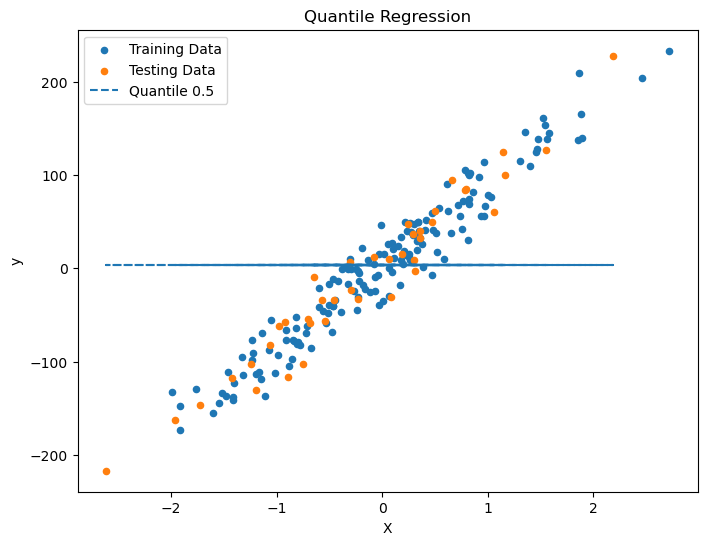

In [11]:
# Plot the data and the quantile regression lines
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, s=20, label="Training Data")
plt.scatter(X_test, y_test, s=20, label="Testing Data")
plt.plot(X_test, y_pred_quantiles, label=f"Quantile {quantiles}", linestyle='dashed')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Quantile Regression")
plt.show()
